In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

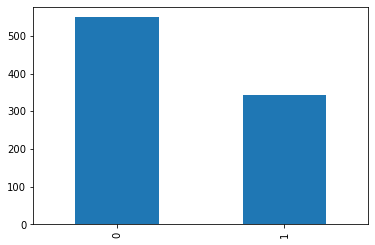

In [5]:
data['Survived'].value_counts().plot(kind="bar")

<AxesSubplot:>

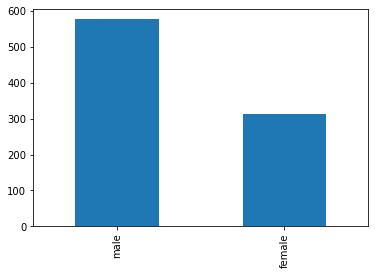

In [6]:
data["Sex"].value_counts().plot(kind="bar")

<AxesSubplot:>

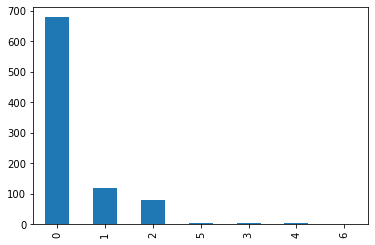

In [7]:
data['Parch'].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Survived,Pclass'>

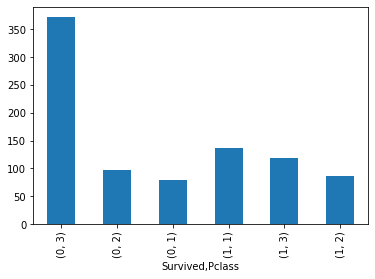

In [8]:
groupof = data.groupby('Survived')['Pclass']
groupof.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Survived'>

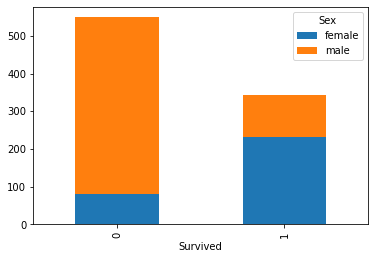

In [9]:
groupof = data.groupby('Survived')['Sex']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

<AxesSubplot:xlabel='Survived'>

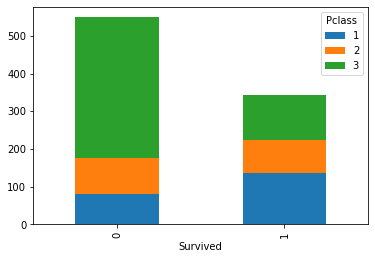

In [10]:
groupof = data.groupby('Survived')['Pclass']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

In [11]:
sns.set()

NameError: name 'sns' is not defined

In [12]:
def convrt(x):
    if(x=="male"):
         x = 0
    elif(x=="female"):
        x= 1
    return x


In [13]:
data["Sex"]=data["Sex"].apply(convrt)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [15]:
data['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [17]:
data["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

<AxesSubplot:xlabel='Survived'>

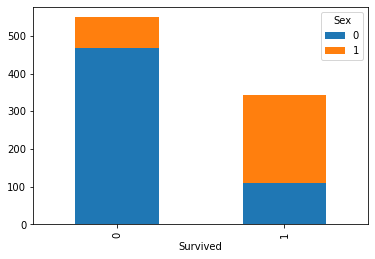

In [18]:
groupof = data.groupby('Survived')['Sex']
groupof.value_counts().unstack().plot(kind="bar",stacked="True")

In [19]:
gender_survived = pd.crosstab(data["Sex"],data["Survived"])

In [20]:
gender_survived.rename({
    0:"No",
    1:"Yes"
},axis=1 ,inplace = True)

In [21]:
gender_survived.rename({
    0:"Male",
    1:"Female"
},axis = 0,inplace= True)

In [22]:
gender_survived["total"] = gender_survived.sum(axis=1)

In [23]:
gender_survived = gender_survived.apply(lambda x:round(100*x/gender_survived["total"]))

In [24]:
gender_survived.drop("total",axis=1,inplace=True)

In [25]:
gender_survived

Survived,No,Yes
Sex,,
Male,81.0,19.0
Female,26.0,74.0


<AxesSubplot:xlabel='Sex'>

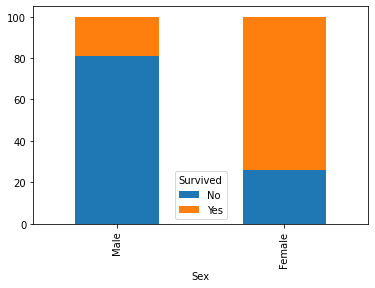

In [26]:
gender_survived.plot(kind = "bar", stacked= True)

In [27]:
gender_survived1 = pd.crosstab(data["Pclass"],data["Survived"])

In [28]:
data['Pclass'].unique()

array([3, 1, 2])

In [29]:
gender_survived1

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [30]:
gender_survived1.rename({
    0:"No",
    1:"Yes"
},axis=1 ,inplace = True)

In [31]:
gender_survived1

Survived,No,Yes
Pclass,,
1,80,136
2,97,87
3,372,119


In [32]:
gender_survived1["total"] = gender_survived1.sum(axis=1)

In [33]:
gender_survived1

Survived,No,Yes,total
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491


In [34]:
gender_survived1 = gender_survived1.apply(lambda x:round(100*x/gender_survived1["total"]))

In [35]:
gender_survived1

Survived,No,Yes,total
Pclass,,,
1,37.0,63.0,100.0
2,53.0,47.0,100.0
3,76.0,24.0,100.0


In [36]:
gender_survived1.drop("total",axis=1,inplace=True)


<AxesSubplot:xlabel='Pclass'>

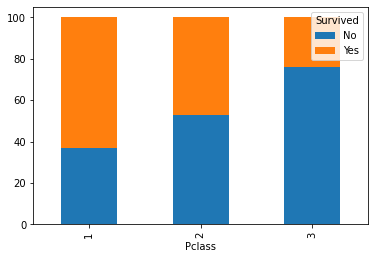

In [37]:
gender_survived1.plot(kind = "bar", stacked= True)

In [38]:
new_data = data.groupby(['Pclass',"Sex"])["Survived"].value_counts()

In [39]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
Name: Survived, dtype: int64

In [40]:
new_data["total"] = new_data.sum()

In [41]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
total                    891
Name: Survived, dtype: int64

In [42]:
new_data

Pclass  Sex  Survived
1       0    0            77
             1            45
        1    1            91
             0             3
2       0    0            91
             1            17
        1    1            70
             0             6
3       0    0           300
             1            47
        1    0            72
             1            72
total                    891
Name: Survived, dtype: int64

In [43]:
new_data = new_data.apply(lambda x:round(100*x/new_data["total"]))

In [44]:
new_data

Sex                       
Survived                  
Pclass Sex Survived       
1      0   0           9.0
           1           5.0
       1   1          10.0
           0           0.0
2      0   0          10.0
           1           2.0
       1   1           8.0
           0           1.0
3      0   0          34.0
           1           5.0
       1   0           8.0
           1           8.0
total                100.0

In [45]:
new_data= pd.DataFrame(new_data)

In [46]:
new_data.columns

MultiIndex([('', '')],
           names=['Sex', 'Survived'])

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

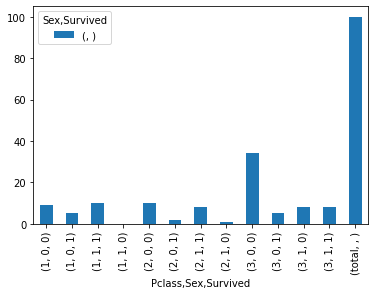

In [47]:
new_data.plot(kind = "bar", stacked= True)

In [48]:
new_data.sort_index(inplace=True)

In [49]:

new_data

Sex                       
Survived                  
Pclass Sex Survived       
1      0   0           9.0
           1           5.0
       1   0           0.0
           1          10.0
2      0   0          10.0
           1           2.0
       1   0           1.0
           1           8.0
3      0   0          34.0
           1           5.0
       1   0           8.0
           1           8.0
total                100.0

<AxesSubplot:xlabel='Pclass,Sex,Survived'>

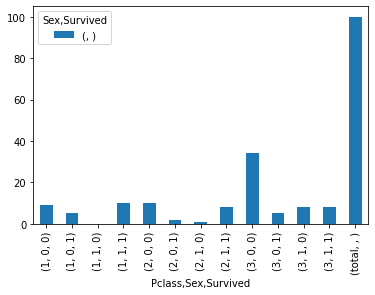

In [50]:
new_data.plot(kind = "bar", stacked= True)

In [51]:
new_data.columns

MultiIndex([('', '')],
           names=['Sex', 'Survived'])

In [52]:
new_data.index

MultiIndex([(      1,  0,  0),
            (      1,  0,  1),
            (      1,  1,  0),
            (      1,  1,  1),
            (      2,  0,  0),
            (      2,  0,  1),
            (      2,  1,  0),
            (      2,  1,  1),
            (      3,  0,  0),
            (      3,  0,  1),
            (      3,  1,  0),
            (      3,  1,  1),
            ('total', '', '')],
           names=['Pclass', 'Sex', 'Survived'])

In [53]:
new_data = new_data.unstack(level='Pclass')

<AxesSubplot:xlabel='Sex,Survived'>

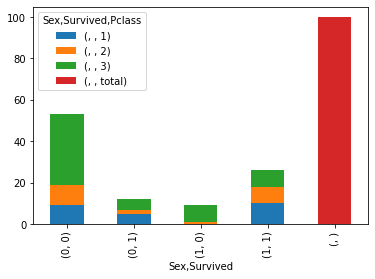

In [54]:
new_data.plot(kind = "bar", stacked= True)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [56]:
model = LogisticRegression()

In [57]:
training_data = data[["PassengerId","Pclass","Fare"]]

In [58]:
output_data = data["Survived"]

In [59]:
x_train,x_test,y_train,y_test = train_test_split(training_data,output_data,test_size=0.3,random_state=42)

In [60]:
model.fit(x_train,y_train)

LogisticRegression()

In [61]:
predictions = model.predict(x_test)

In [62]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1])

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
score = accuracy_score(predictions,y_test)

In [65]:
score

0.6940298507462687

In [66]:
test_data = pd.read_csv("test.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [67]:
test_data = pd.read_csv("test.csv")

In [68]:
test_data = test_data[["PassengerId","Pclass","Fare"]]

In [69]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [70]:
output_data = data["Survived"]

In [71]:
test_data["Fare"] = test_data["Fare"].fillna(training_data["Fare"].mean())

In [72]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [73]:
training_data1 = test_data[["PassengerId","Pclass","Fare"]]

In [74]:
new_predictions = model.predict(training_data1)

In [75]:
new_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [76]:
submission = {
    "PassengerId": test_data["PassengerId"],
    "Survived": new_predictions
    
}

In [77]:
submission

{'PassengerId': 0       892
 1       893
 2       894
 3       895
 4       896
        ... 
 413    1305
 414    1306
 415    1307
 416    1308
 417    1309
 Name: PassengerId, Length: 418, dtype: int64,
 'Survived': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [78]:
submission = pd.DataFrame(submission)

In [79]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
submission.set_index("PassengerId",inplace = True)

In [81]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [82]:
submission.to_csv("submission.csv")

In [83]:
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


<AxesSubplot:>

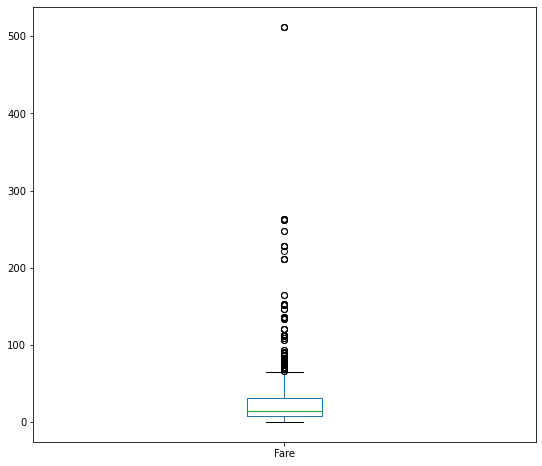

In [84]:
plt.figure(figsize=(9,8))
training_data["Fare"].plot(kind= "box")

In [85]:
training_data[training_data["Fare"]>400]

,PassengerId,Pclass,Fare
258,259,1,512.3292
679,680,1,512.3292
737,738,1,512.3292


In [86]:
training_data[training_data["Fare"]>400].replace({training_data["Fare"].mean()})

,PassengerId,Pclass,Fare
258,259,1,512.3292
679,680,1,512.3292
737,738,1,512.3292


In [87]:
training_data1["Fare"].mean()

35.61899954059467

In [88]:
training_data1.replace({512.3292:35.6271},inplace= True)

<AxesSubplot:>

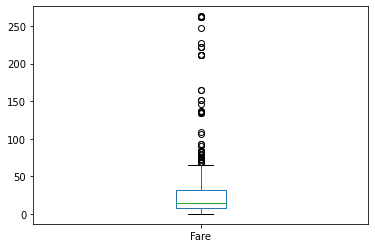

In [89]:
training_data1["Fare"].plot(kind="box")

In [90]:
testing_data = training_data1[["PassengerId","Pclass","Fare"]]

In [91]:
pre =model.predict(testing_data)

In [92]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [93]:
submission1 = {
    "PassengerId": tarining_data1["PassengerId"],
    "Survived": pre
    
}

NameError: name 'tarining_data1' is not defined

In [94]:
submission1 = {
    "PassengerId": training_data1["PassengerId"],
    "Survived": pre
    
}

In [95]:
submission1 = pd.DataFrame(submission1)

In [96]:
submission1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
submission1.set_index("PassengerId")

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [98]:
submission1 = submission1.to_csv("submission1.csv")